# Quantitative analysis of data

In [106]:
%%html
<style>
div.input {
    display:none;
}
</style>

In [99]:
import pandas as pd
import numpy as np
import scipy.stats as scp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [100]:
puf2011 = pd.read_csv('puf2011clean.csv')
puf2011.drop('Unnamed: 0', axis=1, inplace=True)

In [101]:
#Creates sub-dataframes where dependent variables are non-zero
pufE02 = puf2011[(puf2011['E02000']!=0)]
pufE26 = puf2011[(puf2011['E26270']!=0)]
pufP22 = puf2011[(puf2011['P22250']!=0)]
pufP23 = puf2011[(puf2011['P23250']!=0)]

## E02000: Schedule E Income/Loss

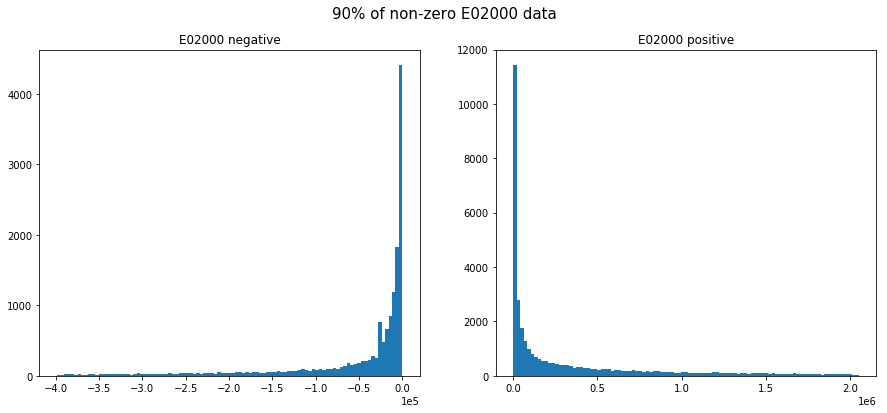

65% of observations are 0

 Non-Zero Summary Statistics:
 Mean = 345,312 
 Std = 1,804,854 
 Max = 65,100,000 
 Min = -40,760,000 
 Skew = 6.95 
 IQR = 316100.0 over [$-4,200.0 , $311,900.0]

 Conclusions:
 • Most of data is zero, rest of data is mostly positive
 • Tails are extremely long, right tail is much longer than left
 • About 90% of non-zero Schedule E income/loss is contained within [-$400,000 , $2,000,000]



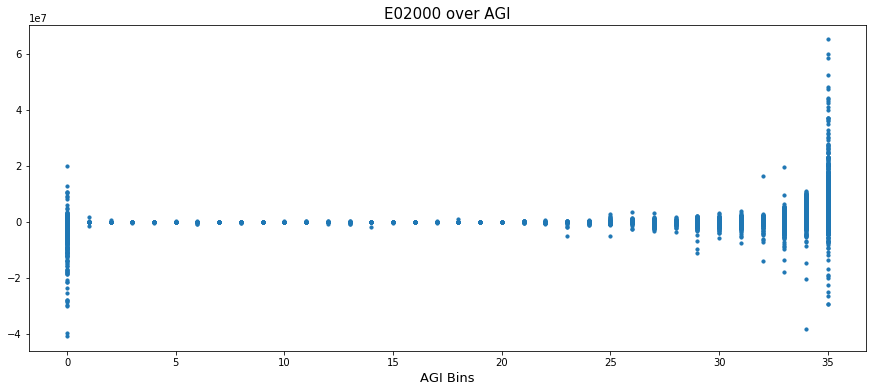

Observations:
 • There are no obvious overall outliers, just extreme-value clustering at AGIR1 = 0 = "No AGI or deficit,"
   and at AGIR1 = 35 = "$10,000,000 or more"


In [102]:
_95th = np.percentile(pufE02['E02000'], 95)
_5th = np.percentile(pufE02['E02000'], 5)

plt.figure(figsize = (15,6))

#Plot positive E02000 data from 0 to 95th percentile
plt.subplot(122)
bins0 = np.linspace(0, _95th, 100)
plt.hist(pufE02['E02000'], bins = bins0, label = 'E02000 positive')
plt.title('E02000 positive')
plt.ticklabel_format(stlye = 'sci', axis = 'x', scilimits = (0,0))

#Plot negative E02000 data from 5th percentile to 0
plt.subplot(121)
bins1 = np.linspace(_5th, 0, 100)
plt.hist(pufE02['E02000'], bins = bins1, label = 'E02000 negative')
plt.title('E02000 negative')
plt.ticklabel_format(stlye = 'sci', axis = 'x', scilimits = (0,0))

plt.suptitle('90% of non-zero E02000 data', size = 15)

plt.show()

#Summary statistics

mean = int(pufE02['E02000'].mean())
std = int(pufE02['E02000'].std())
_max = int(pufE02['E02000'].max())
_min = int(pufE02['E02000'].min())
_25th = np.percentile(pufE02['E02000'], 25)
_75th = np.percentile(pufE02['E02000'], 75)
IQR = _75th - _25th
_0pct = str(int(len(puf2011[puf2011['E02000'] == 0])/len(puf2011)*100))

print(_0pct + '% ' + 'of observations are 0\n\n',
      'Non-Zero Summary Statistics:\n',
      'Mean = ' + '{:,}'.format(mean),'\n',
      'Std = ' + '{:,}'.format(std),'\n',
      'Max = ' + '{:,}'.format(_max),'\n',
      'Min = ' + '{:,}'.format(_min),'\n',
      'Skew = ' + str(round(scp.skew(pufE02['E02000']), 2)),'\n',
      'IQR = ' + str(IQR) + ' over [$' + '{:,}'.format(_25th) + ' , $' + '{:,}'.format(_75th) + ']\n\n',
      'Conclusions:\n',
      '• Most of data is zero, rest of data is mostly positive\n',
      '• Tails are extremely long, right tail is much longer than left\n',
      '• About 90% of non-zero Schedule E income/loss is contained within [-$400,000 , $2,000,000]\n',
      )

#Plot E02000 over AGI bins
plt.figure(figsize = (15,6))
plt.subplot(111)
plt.scatter(pufE02['AGIR1'], pufE02['E02000'], s = 10)
plt.xlabel('AGI Bins', size = 13)
plt.title('E02000 over AGI', size = 15)

plt.show()

print('Observations:\n',
      '• There are no obvious overall outliers, just extreme-value clustering at AGIR1 = 0 = "No AGI or deficit,"\n', 
      '  and at AGIR1 = 35 = "$10,000,000 or more"'
     )

## E26270: Income/Loss From S Corporation or Combined Partnership

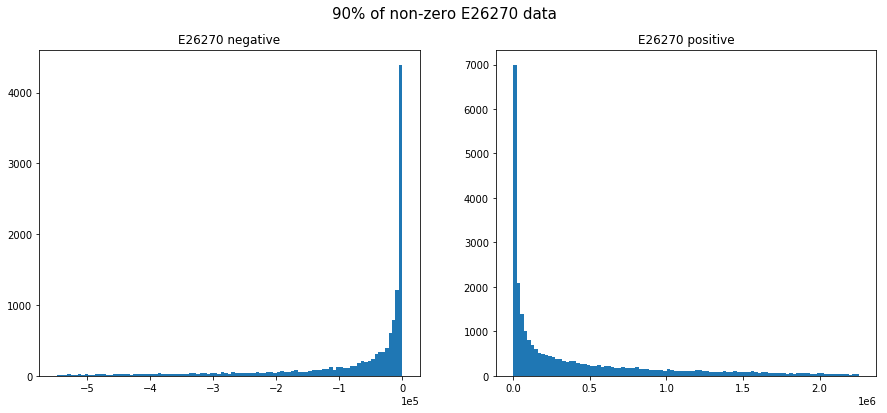

72% of observations are 0

 Non-Zero Summary Statistics:
 Mean = 382,947 
 Std = 1,942,446 
 Max = 65,100,000 
 Min = -40,760,000 
 Skew = 6.16 
 IQR = 316100.0 over [$-5,110.0 , $423,900.0]

 Conclusions:
 • Most of data is zero, rest of data is mostly positive
 • Tails are extremely long, right tail is much longer than left
 • About 90% of non-zero income/loss from an S corporation or combined partnership is contained within
 [-$600,000 , $3,000,000]



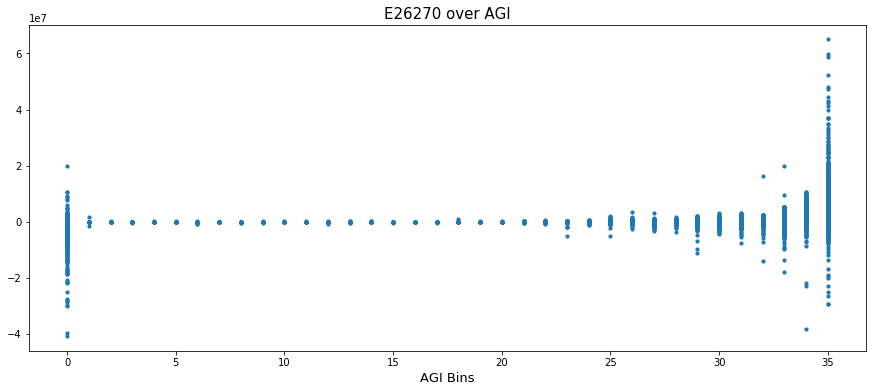

Observations:
 • There are no obvious overall outliers, just extreme-value clustering at AGIR1 = 0 = "No AGI or deficit,"
   and at AGIR1 = 35 = "$10,000,000 or more"
 • E26270 distribution over AGI appears nearly identical to E02000 over AGI, especially in pattern of
   intra-bin outliers. This is perhaps because E26270 reports "Combined partnership and S corporation net
   income/loss," and E02000 reports "Schedule E net income/loss," according to the  PUF documentation, and
   Schedule E income contains E26270 income.


In [103]:
_95th = np.percentile(pufE26['E26270'], 95)
_5th = np.percentile(pufE26['E26270'], 5)

plt.figure(figsize = (15,6))

#Plot positive E26270 data from 0 to 95th percentile
plt.subplot(122)
bins0 = np.linspace(0, _95th, 100)
plt.hist(pufE26['E26270'], bins = bins0, label = 'E26270 positive')
plt.title('E26270 positive')
plt.ticklabel_format(stlye = 'sci', axis = 'x', scilimits = (0,0))

#Plot negative E26270 data from 5th percentile to 0
plt.subplot(121)
bins1 = np.linspace(_5th, 0, 100)
plt.hist(pufE26['E26270'], bins = bins1, label = 'E26270 negative')
plt.title('E26270 negative')
plt.ticklabel_format(stlye = 'sci', axis = 'x', scilimits = (0,0))

plt.suptitle('90% of non-zero E26270 data', size = 15)

plt.show()

#Summary statistics
mean = int(pufE26['E26270'].mean())
std = int(pufE26['E26270'].std())
_max = int(pufE26['E02000'].max())
_min = int(pufE26['E02000'].min())
_25th = np.percentile(pufE26['E26270'], 25)
_75th = np.percentile(pufE26['E26270'], 75)
_0pct = str(int(len(puf2011[puf2011['E26270'] == 0])/len(puf2011)*100))

print(_0pct + '% ' + 'of observations are 0\n\n',
      'Non-Zero Summary Statistics:\n',
      'Mean = ' + '{:,}'.format(mean),'\n',
      'Std = ' + '{:,}'.format(std),'\n',
      'Max = ' + '{:,}'.format(_max),'\n',
      'Min = ' + '{:,}'.format(_min),'\n',
      'Skew = ' + str(round(scp.skew(pufE26['E26270']), 2)),'\n',
      'IQR = ' + str(IQR) + ' over [$' + '{:,}'.format(_25th) + ' , $' + '{:,}'.format(_75th) + ']\n\n',
      'Conclusions:\n',
      '• Most of data is zero, rest of data is mostly positive\n',
      '• Tails are extremely long, right tail is much longer than left\n',
      '• About 90% of non-zero income/loss from an S corporation or combined partnership is contained within\n',
      '[-$600,000 , $3,000,000]\n',
      )

#Plot E26270 over AGI bins
plt.figure(figsize = (15,6))
plt.subplot(111)
plt.scatter(pufE26['AGIR1'], pufE26['E26270'], s = 10)
plt.xlabel('AGI Bins', size = 13)
plt.title('E26270 over AGI', size = 15)

plt.show()

print('Observations:\n',
      '• There are no obvious overall outliers, just extreme-value clustering at AGIR1 = 0 = "No AGI or deficit,"\n', 
      '  and at AGIR1 = 35 = "$10,000,000 or more"\n',
      '• E26270 distribution over AGI appears nearly identical to E02000 over AGI, especially in pattern of\n',
      '  intra-bin outliers. This is perhaps because E26270 reports "Combined partnership and S corporation net\n',
      '  income/loss," and E02000 reports "Schedule E net income/loss," according to the  PUF documentation, and\n',
      '  Schedule E income contains E26270 income.'
     )

## P23250: Long-Term Capital Gain or Loss

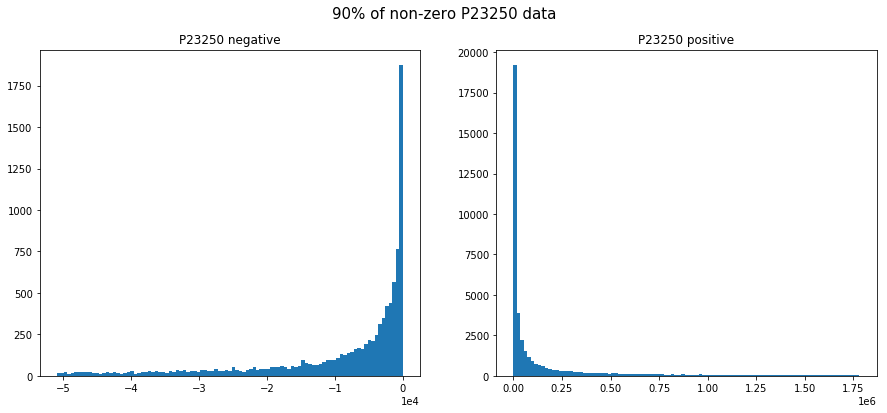

66% of observations are 0

 Non-Zero Summary Statistics:
 Mean = 417,571 
 Std = 2,442,350 
 Max = 91,220,000 
 Min = -28,160,000 
 Skew = 15.16 
 IQR = 316100.0 over [$60.0, $113,000.0]

 Conclusions:
 • Most of data is zero, rest of data is mostly positive
 • Tails are extremely long, positive skew is tremendous
 • About 90% of non-zero long-term capital gain/loss is contained within [-$50,000 , $1,750,000]



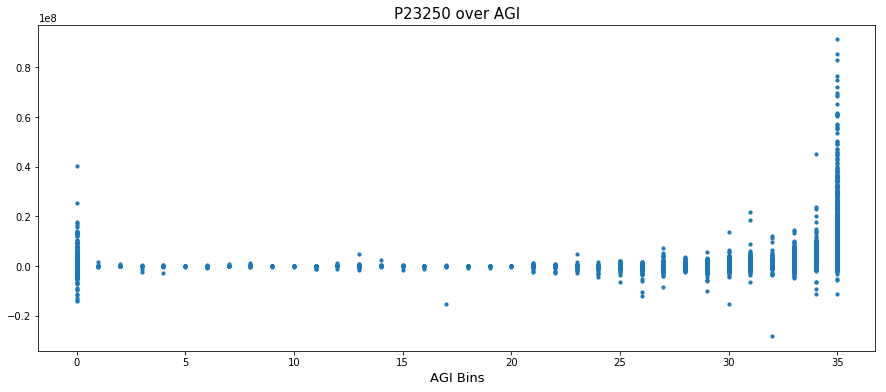

Observations:
 • There are no obvious overall outliers, just extreme-value clustering at AGIR1 = 0 = "No AGI or deficit,"
   and at AGIR1 = 35 = "$10,000,000 or more"



In [104]:
_95th = np.percentile(pufP23['P23250'], 95)
_5th = np.percentile(pufP23['P23250'], 5)

plt.figure(figsize = (15,6))

#Plot positive P23250 data from 0 to 95th percentile
plt.subplot(122)
bins0 = np.linspace(0, _95th, 100)
plt.hist(pufP23['P23250'], bins = bins0, label = 'P23250 positive')
plt.title('P23250 positive')
plt.ticklabel_format(stlye = 'sci', axis = 'x', scilimits = (0,0))

#Plot negative P23250 data from 5th percentile to 0
plt.subplot(121)
bins1 = np.linspace(_5th, 0, 100)
plt.hist(pufP23['P23250'], bins = bins1, label = 'P23250 negative')
plt.title('P23250 negative')
plt.ticklabel_format(stlye = 'sci', axis = 'x', scilimits = (0,0))

plt.suptitle('90% of non-zero P23250 data', size = 15)

plt.show()

#Summary statistics
mean = int(pufP23['P23250'].mean())
std = int(pufP23['P23250'].std())
_max = int(pufP23['P23250'].max())
_min = int(pufP23['P23250'].min())
_25th = np.percentile(pufP23['P23250'], 25)
_75th = np.percentile(pufP23['P23250'], 75)
_0pct = str(int(len(puf2011[puf2011['P23250'] == 0])/len(puf2011)*100))

print(_0pct + '% ' + 'of observations are 0\n\n',
      'Non-Zero Summary Statistics:\n',
      'Mean = ' + '{:,}'.format(mean),'\n',
      'Std = ' + '{:,}'.format(std),'\n',
      'Max = ' + '{:,}'.format(_max),'\n',
      'Min = ' + '{:,}'.format(_min),'\n',
      'Skew = ' + str(round(scp.skew(pufP23['P23250']), 2)),'\n',
      'IQR = ' + str(IQR) + ' over [$' + '{:,}'.format(_25th) + ', $' + '{:,}'.format(_75th) + ']\n\n',
      'Conclusions:\n',
      '• Most of data is zero, rest of data is mostly positive\n',
      '• Tails are extremely long, positive skew is tremendous\n',
      '• About 90% of non-zero long-term capital gain/loss is contained within [-$50,000 , $1,750,000]\n',
      )

#Plot P23250 over AGI bins
plt.figure(figsize = (15,6))
plt.subplot(111)
plt.scatter(pufP23['AGIR1'], pufP23['P23250'], s = 10)
plt.xlabel('AGI Bins', size = 13)
plt.title('P23250 over AGI', size = 15)

plt.show()

print('Observations:\n',
      '• There are no obvious overall outliers, just extreme-value clustering at AGIR1 = 0 = "No AGI or deficit,"\n', 
      '  and at AGIR1 = 35 = "$10,000,000 or more"\n'
     )

## P22250: Short-Term Capital Gain or Loss

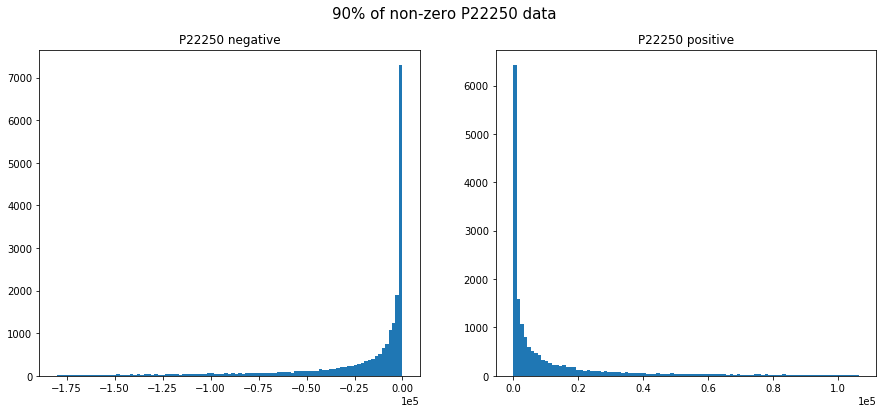

73% of observations are 0

 Non-Zero Summary Statistics:
 Mean = -14,018 
 Std = 956,064 
 Max = 39,410,000 
 Min = -124,900,000 
 Skew = -55.81 
 IQR = 316100.0 over [$-9,915.0 , $3,070.0]

 Conclusions:
 • Most of data is zero, rest of data is mostly negative
 • Tails are extremely long, negative skew is tremendous
 • 50% of non-zero short-term capital gain/loss is contained within [-$9,915 , $113,000]
 • About 90% of non-zero short-term capital gain/loss is contained within [-$50,000 , $3,070], making these
   data highly clustered about zero



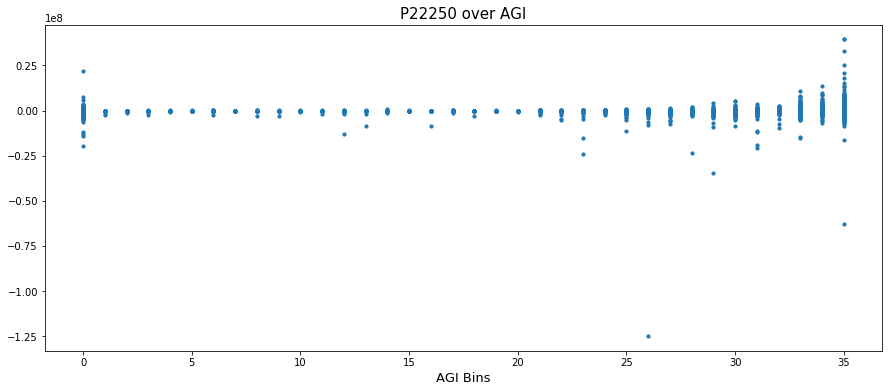

Observations:
 • There is one clear outlier (RECID = 102565) with a short-term capital loss of $124,900,000 which is nearly
   double the next-lowest loss of $63,070,000

RECID: 102565


,AGIR1,DSI,EIC,FLPDYR,F2441,MARS,N24,XTOT,E00200,E00300,...,P23250,E26270,E32800,RECID,S006,constant,MARS1,MARS2,MARS3,MARS4
46928,26,0,0,2011,0,1,0,1,86000.0,10.0,...,0.0,0.0,0,102565,997,1.0,1,0,0,0


In [105]:
_95th = np.percentile(pufP22['P22250'], 95)
_5th = np.percentile(pufP22['P22250'], 5)

plt.figure(figsize = (15,6))

#Plot positive P23250 data from 0 to 95th percentile
plt.subplot(122)
bins0 = np.linspace(0, _95th, 100)
plt.hist(pufP22['P22250'], bins = bins0, label = 'P22250 positive')
plt.title('P22250 positive')
plt.ticklabel_format(stlye = 'sci', axis = 'x', scilimits = (0,0))

#Plot negative P23250 data from 5th percentile to 0
plt.subplot(121)
bins1 = np.linspace(_5th, 0, 100)
plt.hist(pufP22['P22250'], bins = bins1, label = 'P22250 negative')
plt.title('P22250 negative')
plt.ticklabel_format(stlye = 'sci', axis = 'x', scilimits = (0,0))

plt.suptitle('90% of non-zero P22250 data', size = 15)

plt.show()

#Summary statistics
mean = int(pufP22['P22250'].mean())
std = int(pufP22['P22250'].std())
_max = int(pufP22['P22250'].max())
_min = int(pufP22['P22250'].min())
_25th = np.percentile(pufP22['P22250'], 25)
_75th = np.percentile(pufP22['P22250'], 75)
_0pct = str(int(len(puf2011[puf2011['P22250'] == 0])/len(puf2011)*100))

print(_0pct + '% ' + 'of observations are 0\n\n',
      'Non-Zero Summary Statistics:\n',
      'Mean = ' + '{:,}'.format(mean),'\n',
      'Std = ' + '{:,}'.format(std),'\n',
      'Max = ' + '{:,}'.format(_max),'\n',
      'Min = ' + '{:,}'.format(_min),'\n',
      'Skew = ' + str(round(scp.skew(pufP22['P22250']), 2)),'\n',
      'IQR = ' + str(IQR) + ' over [$' + '{:,}'.format(_25th) + ' , $' + '{:,}'.format(_75th) + ']\n\n',
      'Conclusions:\n',
      '• Most of data is zero, rest of data is mostly negative\n',
      '• Tails are extremely long, negative skew is tremendous\n',
      '• 50% of non-zero short-term capital gain/loss is contained within [-$9,915 , $113,000]\n',
      '• About 90% of non-zero short-term capital gain/loss is contained within [-$50,000 , $3,070], making these\n',
      '  data highly clustered about zero\n'
      )

#Plot E02000 over AGI bins
plt.figure(figsize = (15,6))
plt.subplot(111)
plt.scatter(pufP22['AGIR1'], pufP22['P22250'], s = 10)
plt.xlabel('AGI Bins', size = 13)
plt.title('P22250 over AGI', size = 15)

plt.show()

print('Observations:\n',
      '• There is one clear outlier (RECID = 102565) with a short-term capital loss of $124,900,000 which is nearly\n',
      '  double the next-lowest loss of $63,070,000')

print('\nRECID: 102565')
puf2011[puf2011['RECID']==102565]